# Diabetes Data Analysis

In [1]:
# Importing relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

from sklearn import linear_model

pd.set_option('max_rows',10) # Limit the number of rows to be shown
# Store within the notebook
%matplotlib inline

# a. Data processing

In [2]:
diabetes = pd.read_csv('diabetes.csv') # Importing the dataset from excel

In [3]:
diabetes

,Patient_Number,Cholesterol,Glucose,HDL_Chol,Chol_HDL_Ratio,Age,Gender,Height,Weight,BMI,Systolic_BP,Diastolic_BP,Waist,Hip,Waist_Hip_Ratio,Diabetic
0,1,193,77,49,3.9,19,0,61,119,22.5,118,70,32,38,0.84,0
1,2,146,79,41,3.6,19,0,60,135,26.4,108,58,33,40,0.83,0
2,3,217,75,54,4.0,20,0,67,187,29.3,110,72,40,45,0.89,0
3,4,226,97,70,3.2,20,0,64,114,19.6,122,64,31,39,0.79,0
4,5,164,91,67,2.4,20,0,70,141,20.2,122,86,32,39,0.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,227,105,44,5.2,83,0,59,125,25.2,150,90,35,40,0.88,0
386,387,226,279,52,4.3,84,0,60,192,37.5,144,88,41,48,0.85,1
387,388,301,90,118,2.6,89,0,61,115,21.7,218,90,31,41,0.76,0
388,389,232,184,114,2.0,91,0,61,127,24.0,170,82,35,38,0.92,1


In [4]:
#diabetes = diabetes.sample(frac=1) # Randomises rows which changes the accuracies of each method

In [5]:
del diabetes['Patient_Number'] # Patient Number does not provide any meaningful information

# b. Difference before and after normalizing data 

C:\Users\nabil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


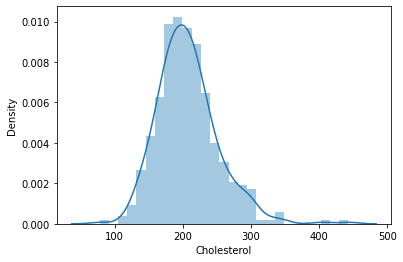

In [6]:
sns.distplot(diabetes['Cholesterol']) # Using seaborn to display normal distribution
plt.show() # Slightly skewed

In [7]:
# Using log to normalize data
diabetes['Glucose'] = np.log(diabetes['Glucose']) 
diabetes['Cholesterol'] = np.log(diabetes['Cholesterol'])
diabetes['HDL_Chol'] = np.log(diabetes['HDL_Chol'])
diabetes['Systolic_BP'] = np.log(diabetes['Systolic_BP'])
diabetes['Diastolic_BP'] = np.log(diabetes['Diastolic_BP'])
diabetes['Height'] = np.log(diabetes['Height'])
diabetes['Weight'] = np.log(diabetes['Weight'])
diabetes['BMI'] = np.log(diabetes['BMI'])
diabetes['Age'] = np.log(diabetes['Age'])
diabetes['Hip'] = np.log(diabetes['Hip'])
diabetes['Waist'] = np.log(diabetes['Waist'])
diabetes['Chol_HDL_Ratio'] = np.log(diabetes['Chol_HDL_Ratio'])

C:\Users\nabil\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


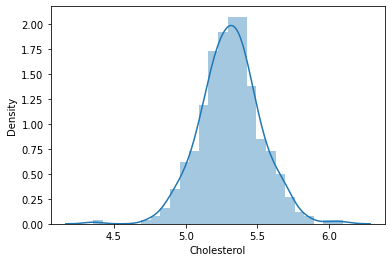

In [8]:
sns.distplot(diabetes['Cholesterol'])
plt.show()

# c. Stats on relationship between features and Diabetes

In [9]:
females = len(diabetes[diabetes['Gender']==0]) # Find the number of females and males
males = len(diabetes[diabetes['Gender']==1])
# Number of diabetic females and males
female_diabetic = len(diabetes.loc[(diabetes['Diabetic']==1) & (diabetes['Gender']==0)]) 
male_diabetic = len(diabetes.loc[(diabetes['Diabetic']==1) & (diabetes['Gender']==1)])

print('There are %s females and %s are diabetic' % (females, female_diabetic))
print('There are %s males and %s are diabetic' % (males, male_diabetic))

There are 228 females and 34 are diabetic
There are 162 males and 26 are diabetic


In [10]:
X = diabetes.drop(['Diabetic'],axis=1) # Could have also removed Patient_Number here
y = diabetes['Diabetic']

In [11]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2  # Feature selection methods

In [12]:
kbest = SelectKBest(score_func = chi2, k = 'all') # Calling select-K-best on all features
ordered_features = kbest.fit(X,y)

In [13]:
df_scores = pd.DataFrame(ordered_features.scores_, columns=['K-Score'])
df_columns = pd.DataFrame(X.columns, columns = ['Feature'])
feature_rank = pd.concat([df_scores,df_columns],axis=1) # Combine both dataframes that contain feature and corresponding score
feature_rank.nlargest(10,'K-Score')[:10].reset_index(drop=True)

,K-Score,Feature
0,5.357492,Glucose
1,1.937243,Chol_HDL_Ratio
2,1.263011,Age
3,0.223215,HDL_Chol
4,0.141694,BMI
5,0.120645,Waist
6,0.114459,Cholesterol
7,0.107650,Weight
8,0.087975,Systolic_BP
9,0.072965,Waist_Hip_Ratio


In [14]:
mu_ifo = mutual_info_classif(X,y)
mu_data = pd.Series(mu_ifo, index = X.columns)
mu_data.sort_values(ascending=False)[:10]

Glucose            0.216746
Waist_Hip_Ratio    0.032711
Chol_HDL_Ratio     0.031676
Age                0.024232
BMI                0.022523
Hip                0.021528
Gender             0.015548
Weight             0.012471
Waist              0.010667
Systolic_BP        0.005573
dtype: float64

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

<AxesSubplot:>

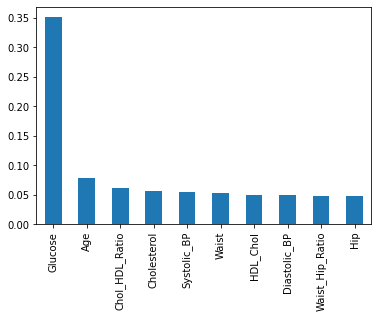

In [16]:
ranked_features = pd.Series(model.feature_importances_, index = X.columns)
ranked_features.nlargest(10).plot(kind='bar') # Displaying results as bar chart

<AxesSubplot:>

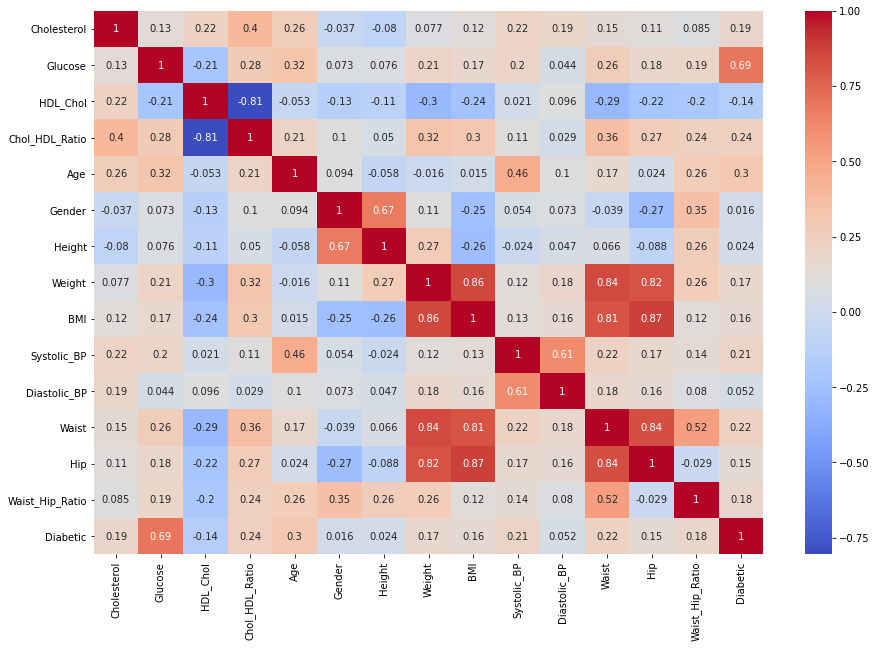

In [17]:
corr=diabetes.corr() # Viewing the correlation between features
plt.figure(figsize=(15,10)) # 0=No correlation, 1=Perfect correlation
sns.heatmap(corr, annot = True, cmap="coolwarm")

(4.356708826689592, 6.093569770045136)

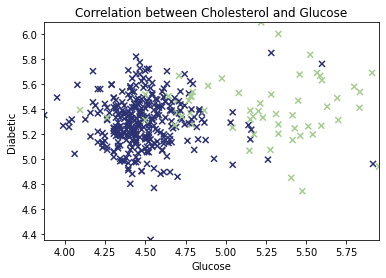

In [18]:
x = diabetes['Glucose'].values  #X-Axis - Glucose
y = diabetes['Cholesterol'].values  #Y-Axis - Cholesterol
diabetic = diabetes['Diabetic'].values  # Patients who are diabetic

plt.figure()
plt.title('Correlation between Cholesterol and Glucose')
plt.scatter(x,y,c=diabetic,cmap='crest_r',marker='x')

plt.xlabel('Glucose')
plt.ylabel('Diabetic')
plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max()) 

# 1. SVC

In [19]:
x = diabetes[['Glucose','Age']].values # Binary features to train
y = diabetes['Diabetic'].values

In [20]:
from sklearn import svm
svc = svm.SVC(kernel='linear').fit(x,y)

(3.0, 6.5, 2.0, 5.5)

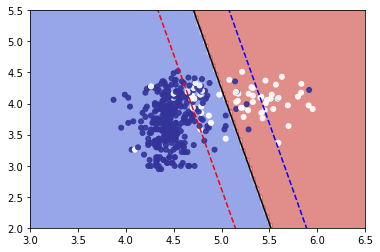

In [21]:
X,Y = np.mgrid[1:8:200j,1:8:200j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.6,cmap='coolwarm')
plt.contour(X,Y,Z,colors=['r','k','b'],linestyles=['--','-','--'],levels=[-1,0,1])

plt.scatter(x[:,0],x[:,1],c=y,s=25,alpha=0.9,cmap='terrain')
plt.axis([3, 6.5, 2, 5.5])

# 2.a. Logistic Regression

In [22]:
logisticReg = linear_model.LogisticRegression(max_iter=200)

In [23]:
train = diabetes.drop(['Diabetic'],axis=1) # Features to train data on excluding target 'Diabetic'

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, diabetes['Diabetic'], test_size=0.20, random_state=0)

In [25]:
x_train

,Cholesterol,Glucose,HDL_Chol,Chol_HDL_Ratio,Age,Gender,Height,Weight,BMI,Systolic_BP,Diastolic_BP,Waist,Hip,Waist_Hip_Ratio
289,5.666427,5.587249,3.637586,2.028148,4.077537,1,4.219508,5.129899,3.246491,4.955827,4.369448,3.583519,3.637586,0.95
56,5.241747,4.564348,3.850148,1.386294,3.332205,0,4.158883,5.298317,3.535145,4.912655,3.951244,3.637586,3.806662,0.84
8,5.438079,4.718499,4.158883,1.280934,2.995732,1,4.204693,5.068904,3.214868,4.605170,4.499810,3.433987,3.663562,0.79
264,5.159055,4.532599,4.343805,0.832909,4.007333,1,4.248495,4.941642,3.000720,4.770685,4.454347,3.465736,3.496508,0.97
134,5.370638,4.852030,3.526361,1.840550,3.637586,0,4.060443,5.273000,3.708682,4.624973,4.219508,3.737670,3.912023,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,5.308268,4.394449,4.007333,1.308333,4.158883,0,4.127134,5.117994,3.417727,5.247024,4.770685,3.784190,3.850148,0.94
192,5.560682,4.204693,3.828641,1.740466,3.784190,0,4.127134,5.068904,3.370738,4.941642,4.543295,3.583519,3.761200,0.84
117,5.501258,4.779123,3.258097,2.240710,3.583519,1,4.189655,5.187386,3.363842,5.010635,4.521789,3.610918,3.737670,0.88
47,5.318120,4.127134,4.248495,1.064711,3.295837,0,4.204693,5.220356,3.367296,4.700480,4.499810,3.555348,3.784190,0.80


In [26]:
logisticReg.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [27]:
logisticReg.predict(x_test)[:10] # Display first 10 predictions

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [28]:
y_test.to_numpy()[:10] # Score function prefers arrays instead of vector

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

# 2.b. LogisticReg Analysis

In [29]:
logisticReg.score(x_test,y_test)

0.9230769230769231

In [30]:
y_preds = logisticReg.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_preds) # Confusion matrix showing TP,TN,FP,FN

<AxesSubplot:>

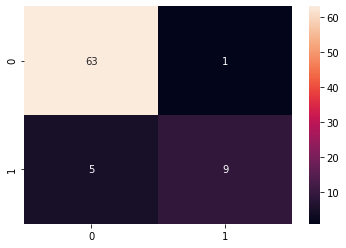

In [32]:
sns.heatmap(cm,annot=True)

# 3. K-nearest neighbours Classification

In [33]:
# Need to select variables that are necessary for predictions (i.e., most predictive)
training = diabetes[['Glucose','Cholesterol','Waist','Age','Chol_HDL_Ratio','BMI','Weight','Waist_Hip_Ratio','Hip']] 
training

,Glucose,Cholesterol,Waist,Age,Chol_HDL_Ratio,BMI,Weight,Waist_Hip_Ratio,Hip
0,4.343805,5.262690,3.465736,2.944439,1.360977,3.113515,4.779123,0.84,3.637586
1,4.369448,4.983607,3.496508,2.944439,1.280934,3.273364,4.905275,0.83,3.688879
2,4.317488,5.379897,3.688879,2.995732,1.386294,3.377588,5.231109,0.89,3.806662
3,4.574711,5.420535,3.433987,2.995732,1.163151,2.975530,4.736198,0.79,3.663562
4,4.510860,5.099866,3.465736,2.995732,0.875469,3.005683,4.948760,0.82,3.663562
...,...,...,...,...,...,...,...,...,...
385,4.653960,5.424950,3.555348,4.418841,1.648659,3.226844,4.828314,0.88,3.688879
386,5.631212,5.420535,3.713572,4.430817,1.458615,3.624341,5.257495,0.85,3.871201
387,4.499810,5.707110,3.433987,4.488636,0.955511,3.077312,4.744932,0.76,3.713572
388,5.214936,5.446737,3.555348,4.510860,0.693147,3.178054,4.844187,0.92,3.637586


In [34]:
# I am going to be splitting the data into a ratio of 80/20, training and testing respectively

x_train = training[:int(len(training)*0.8)]
y_train = diabetes[['Diabetic']][:int(len(training)*0.8)]

x_test = training[int(len(training)*0.8):]
y_test = diabetes[['Diabetic']][int(len(training)*0.8):]

In [35]:
y_train = np.array(y_train).reshape(312,) # Reshaping since function below prefers an array instead of vector

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # Best score with default 5 k neighbours
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [37]:
knn.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [38]:
np.array(y_test).reshape(78,)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

# 3.b. KNN Analysis

In [39]:
knn.score(x_test, y_test)

0.8333333333333334

In [40]:
y_preds = knn.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_preds)

<AxesSubplot:>

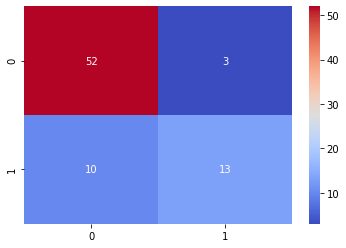

In [42]:
sns.heatmap(cm,annot=True,cmap='coolwarm')

# Cross-Validation

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
# Using pre-defined function classify to produce accuracies for each data analytic method
def classify(model, x, y):
    model.fit(x_train,y_train)
    print('Accuracy is: ', model.score(x_test,y_test)*100)
    score = cross_val_score(model,x,y,cv=5)                  # we set the number of folds to 5
    print('Cross validation Accuracy: ', np.mean(score)*100)

In [45]:
y_test = np.array(y_test).reshape(78,)

In [46]:
print('##########\nSVC')
classify(svc,x,y)
print()
print('##########\nLogistic Regression')
classify(logisticReg,x_test,y_test)
print()
print('##########\nK-nearest neighbours')
classify(knn,x_test,y_test)

##########
SVC
Accuracy is:  85.8974358974359
Cross validation Accuracy:  91.7948717948718

##########
Logistic Regression
Accuracy is:  84.61538461538461
Cross validation Accuracy:  80.83333333333333

##########
K-nearest neighbours
Accuracy is:  83.33333333333334
Cross validation Accuracy:  80.83333333333333
